
# INSTRUÇÃO PRÁTICA - IP-P010 - ETAPA 2 - PLOTAGEM
## PP - PROGRAMAÇÃO EM PYTHON

### RESIDENTE: JOSE ULIAN CARDOSO ALMEIDA



In [1]:
import pandas as pd
from faker import Faker
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fake = Faker('pt_BR')  # Configuração para gerar dados em português do Brasil

In [3]:
# Gerar dados aleatórios
np.random.seed(50)

In [4]:
nomes = [fake.name() for _ in range(1000)]
sexos = np.random.choice(['M', 'F'], size=1000)
idades = np.random.randint(18, 29, size=1000)
emails = [fake.email() for _ in range(1000)]
notas_enem = np.random.randint(640, 801, size=1000)
cra_2_sem = np.random.uniform(5, 10, size=1000)
cra_4_sem = np.random.uniform(5, 10, size=1000)
cra_6_sem = np.random.uniform(5, 10, size=1000)
abandonos = np.random.choice([True, False], size=1000)
semestre_abandono = np.random.randint(1, 11, size=1000)

In [5]:
# Ajustar CRAs após o semestre de abandono
for i in range(1000):
    if abandonos[i]:
        if semestre_abandono[i] <= 2:
            cra_2_sem[i] = np.nan
        elif semestre_abandono[i] <= 4:
            cra_4_sem[i] = np.nan
        elif semestre_abandono[i] <= 6:
            cra_6_sem[i] = np.nan

In [6]:
# Criar DataFrame
data = {
    'Nome': nomes,
    'CPF': [fake.cpf() for _ in range(1000)],
    'Idade': idades,
    'Sexo': sexos,
    'Email': emails,
    'Nota_ENEM': notas_enem,
    'CRA_2º_Semestre': cra_2_sem,
    'CRA_4º_Semestre': cra_4_sem,
    'CRA_6º_Semestre': cra_6_sem,
    'Abandono': abandonos,
    'Semestre_Abandono': semestre_abandono
}

In [7]:
df = pd.DataFrame(data)

In [8]:
# Visualizar as primeiras linhas do DataFrame
df.head()
#df.to_csv('dados_alunos.csv', index=False)

,Nome,CPF,Idade,Sexo,Email,Nota_ENEM,CRA_2º_Semestre,CRA_4º_Semestre,CRA_6º_Semestre,Abandono,Semestre_Abandono
0,Kamilly Teixeira,726.918.354-64,22,M,claricearaujo@example.com,771,NaN,5.491834,5.495809,True,1
1,Fernando Ramos,901.745.628-02,20,M,wcastro@example.org,777,6.466784,5.570117,8.355556,False,7
2,Vitor Hugo Rocha,214.895.376-19,22,F,vitor-hugofarias@example.net,770,9.559240,7.459101,7.298546,False,9
3,Ana da Rocha,405.237.981-05,20,F,cauecastro@example.net,658,NaN,8.187005,7.770323,True,2
4,Carolina Araújo,960.824.375-00,25,F,eloahrocha@example.net,787,9.227646,5.956309,8.626647,True,8


In [9]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [10]:
#df.to_csv('dados_alunos.csv', index=False)

In [11]:
contagem_sexo = df['Sexo'].value_counts()

In [12]:
print('A divisão por gênero é:', contagem_sexo)

A divisão por gênero é: Sexo
F    523
M    477
Name: count, dtype: int64


### 1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.
### Será observador o percentual de cada gênero.

In [13]:
contagem_masculino = sum(1 for sexo in df['Sexo'] if sexo == 'M')

In [14]:
contagem_feminino = sum(1 for sexo in df['Sexo'] if sexo == 'F')

In [15]:
print('Percentual por gênero')
print('Masculino: ', contagem_masculino/1000, '%')
print('Feminino: ', contagem_feminino/1000, '%')

Percentual por gênero
Masculino:  0.477 %
Feminino:  0.523 %


### 2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.

In [16]:
df.columns

Index(['Nome', 'CPF', 'Idade', 'Sexo', 'Email', 'Nota_ENEM', 'CRA_2º_Semestre',
       'CRA_4º_Semestre', 'CRA_6º_Semestre', 'Abandono', 'Semestre_Abandono'],
      dtype='object')

In [17]:
media_enem_18_ate_28_anos = df.loc[(df['Idade'] >= 18) & (df['Idade'] <= 28), 'Nota_ENEM'].mean()

In [18]:
print('Pontuação média no ENEM:', media_enem_18_ate_28_anos)

Pontuação média no ENEM: 721.494


### 3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.

In [19]:
nota_enem_min = 640
nota_enem_max = 801

nota_normalizada_min = 5
nota_normalizada_max = 10

In [20]:
nota_ponderada = (nota_normalizada_max - nota_normalizada_min) / (nota_enem_max - nota_enem_min)

In [21]:
df['Nota_ENEM_Ponderada'] = nota_normalizada_min + nota_ponderada * (df['Nota_ENEM'] - nota_enem_min)

In [22]:
df.head()

,Nome,CPF,Idade,Sexo,Email,Nota_ENEM,CRA_2º_Semestre,CRA_4º_Semestre,CRA_6º_Semestre,Abandono,Semestre_Abandono,Nota_ENEM_Ponderada
0,Kamilly Teixeira,726.918.354-64,22,M,claricearaujo@example.com,771,NaN,5.491834,5.495809,True,1,9.068323
1,Fernando Ramos,901.745.628-02,20,M,wcastro@example.org,777,6.466784,5.570117,8.355556,False,7,9.254658
2,Vitor Hugo Rocha,214.895.376-19,22,F,vitor-hugofarias@example.net,770,9.559240,7.459101,7.298546,False,9,9.037267
3,Ana da Rocha,405.237.981-05,20,F,cauecastro@example.net,658,NaN,8.187005,7.770323,True,2,5.559006
4,Carolina Araújo,960.824.375-00,25,F,eloahrocha@example.net,787,9.227646,5.956309,8.626647,True,8,9.565217


In [23]:
def plot_top_10_notas_enem(df):
    top_10_notas = df['Nota_ENEM'].nlargest(10).sort_values().reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), top_10_notas, marker='o', linestyle='-')
    plt.title('Evolução das 10 Maiores Notas do ENEM')
    plt.xlabel('Contagem de Alunos')
    plt.ylabel('Nota ENEM')
    plt.grid(True)
    plt.show()

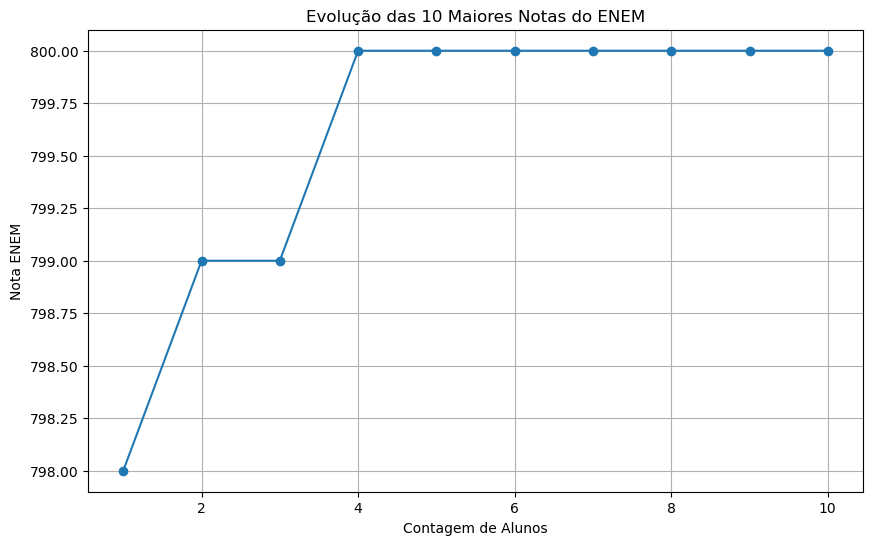

In [24]:
plot_top_10_notas_enem(df)

In [25]:
def plot_top_10_notas_2(df):
    top_10_notas = df['CRA_2º_Semestre'].nlargest(10).sort_values().reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), top_10_notas, marker='o', linestyle='-')
    plt.title('Evolução das 10 Maiores Notas do 2º Semestre')
    plt.xlabel('Contagem de Alunos')
    plt.ylabel('CRA 2º Semestre')
    plt.grid(True)
    plt.show()

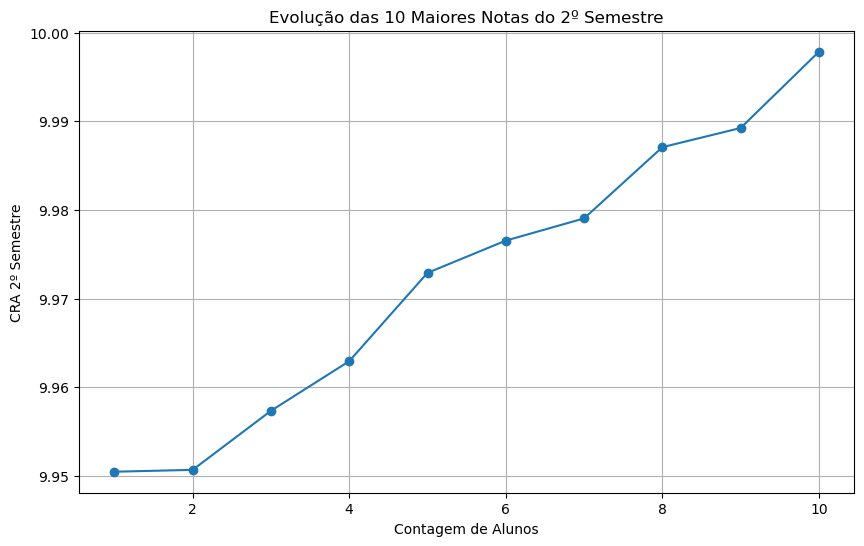

In [26]:
plot_top_10_notas_2(df)

In [27]:
def plot_top_10_notas_4(df):
    top_10_notas = df['CRA_4º_Semestre'].nlargest(10).sort_values().reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), top_10_notas, marker='o', linestyle='-')
    plt.title('Evolução das 10 Maiores Notas do 4º Semestre')
    plt.xlabel('Contagem de Alunos')
    plt.ylabel('CRA 4º Semestre')
    plt.grid(True)
    plt.show()

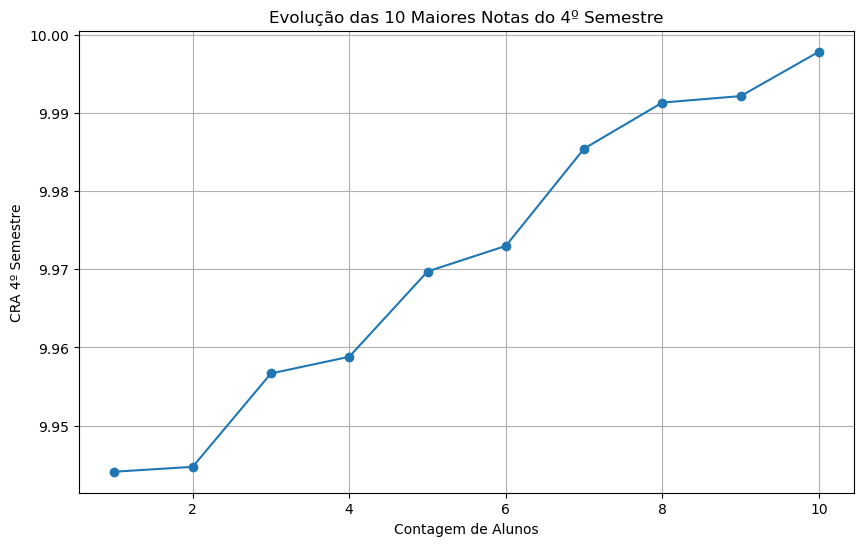

In [28]:
plot_top_10_notas_4(df)

In [29]:
def plot_top_10_notas_6(df):
    top_10_notas = df['CRA_6º_Semestre'].nlargest(10).sort_values().reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), top_10_notas, marker='o', linestyle='-')
    plt.title('Evolução das 10 Maiores Notas do 6º Semestre')
    plt.xlabel('Contagem de Alunos')
    plt.ylabel('CRA 6º Semestre')
    plt.grid(True)
    plt.show()

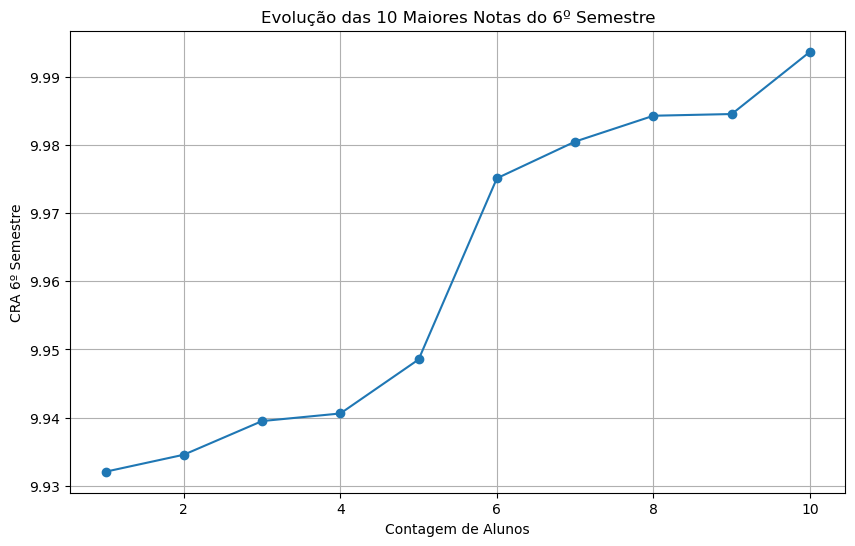

In [30]:
plot_top_10_notas_6(df)

### 4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre.

In [31]:
def plot_top_10_notas_ponderadas(df):
    top_10_notas = df['Nota_ENEM_Ponderada'].nlargest(10).sort_values().reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), top_10_notas, marker='o', linestyle='-')
    plt.title('Evolução das 10 Maiores Notas Ponderadas')
    plt.xlabel('Contagem de Alunos')
    plt.ylabel('Nota Enem Ponderada')
    plt.grid(True)
    plt.show()

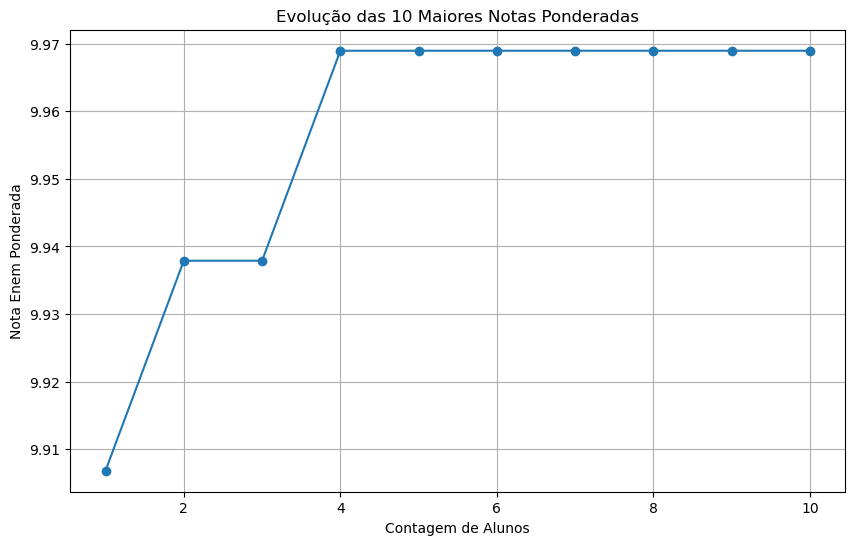

In [32]:
plot_top_10_notas_ponderadas(df)

### 5. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.

In [33]:
def plot_top_10_notas_por_sexo(df):
    top_10_masculino = df[df['Sexo'] == 'M']['Nota_ENEM_Ponderada'].nlargest(10).sort_values().reset_index(drop=True)
    top_10_feminino = df[df['Sexo'] == 'F']['Nota_ENEM_Ponderada'].nlargest(10).sort_values().reset_index(drop=True)
    plt.figure(figsize=(10, 6))

    plt.plot(range(1, len(top_10_masculino) + 1), top_10_masculino, marker='o', linestyle='-', label='Masculino')
    plt.plot(range(1, len(top_10_feminino) + 1), top_10_feminino, marker='s', color='green', linestyle='-', label='Feminino')

    plt.title('Evolução das 10 Maiores Notas do ENEM Ponderadas por Sexo')
    plt.xlabel('Contagem de Alunos')
    plt.ylabel('Nota ENEM Ponderada')
    plt.legend()
    plt.grid(True)
    plt.show()

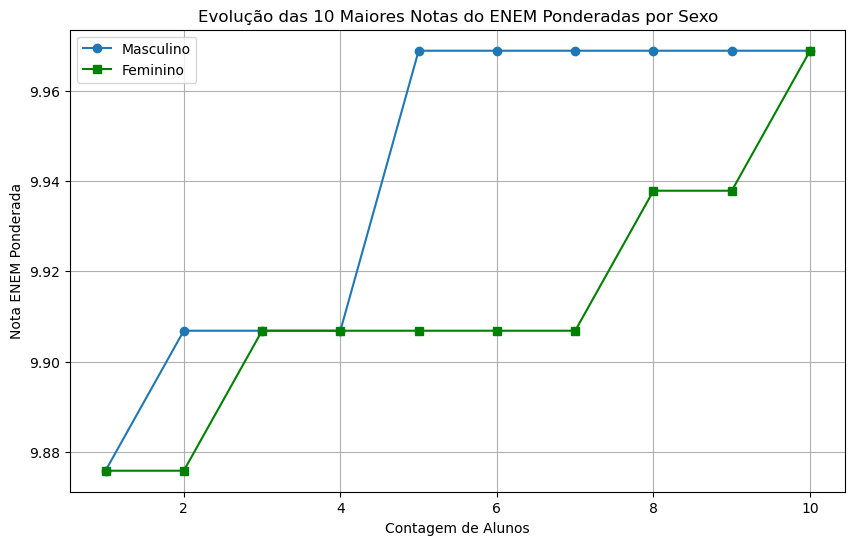

In [34]:
plot_top_10_notas_por_sexo(df)

In [35]:
df.columns

Index(['Nome', 'CPF', 'Idade', 'Sexo', 'Email', 'Nota_ENEM', 'CRA_2º_Semestre',
       'CRA_4º_Semestre', 'CRA_6º_Semestre', 'Abandono', 'Semestre_Abandono',
       'Nota_ENEM_Ponderada'],
      dtype='object')